This notebook aims to provide exploratory analysis of "U.S. Renewable Energy Technical Potentials: A GIS-Based Analysis" from the NREL. Data provided in .csv format from [data.gov](https://catalog.data.gov/es_AR/dataset/united-states-renewable-energy-technical-potential-27887).

According to the [report](https://openei.org/doe-opendata/dataset/5346c5c2-be26-4be7-9663-b5a98cbb7527/resource/01fe78a8-77b6-4c59-bc36-cae177ee86c3/download/usretechpotential.pdf), "These are technology-specific estimates of energy generation potential based on renewable resource availability and quality, technical system performance, topographic limitations, environmental, and land-use constraints only. The estimates do not consider (in most cases) economic or market constraints, and therefore do not represent a level of renewable generation that might actually be deployed."

### Acronyms included in report

PV = photovoltaics
GW = gigawatt (1 billion watts)
GWh = gigawatt

In [2]:
#Math and DataFrames
import numpy as np
import scipy.stats
import scipy.special
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/usretechnicalpotential.csv')

In [6]:
df.head(2)

,Unnamed: 0,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
0,Alabama,35850,20,426,3706838,2114,44058,15475.0,12,0,...,1533,0,326186,0,0,535489.0,67.0,4102,0,2435
1,Alaska,166,0,2,8282976,9005,187608,NaN,1,0,...,61,0,13156,15437,1,NaN,NaN,23675,5,3053


In [8]:
df = df.rename(columns={"Unnamed: 0": "state"})

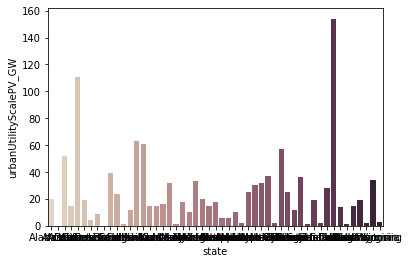

In [12]:
sns.barplot(x="state", y="urbanUtilityScalePV_GW", palette="ch:.25", data=df);

[Text(0, 0, 'Alabama'),
 Text(0, 0, 'Alaska'),
 Text(0, 0, 'Arizona'),
 Text(0, 0, 'Arkansas'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Colorado'),
 Text(0, 0, 'Connecticut'),
 Text(0, 0, 'Delaware'),
 Text(0, 0, 'District of Columbia'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Georgia'),
 Text(0, 0, 'Hawaii'),
 Text(0, 0, 'Idaho'),
 Text(0, 0, 'Illinois'),
 Text(0, 0, 'Indiana'),
 Text(0, 0, 'Iowa'),
 Text(0, 0, 'Kansas'),
 Text(0, 0, 'Kentucky'),
 Text(0, 0, 'Louisiana'),
 Text(0, 0, 'Maine'),
 Text(0, 0, 'Maryland'),
 Text(0, 0, 'Massachusetts'),
 Text(0, 0, 'Michigan'),
 Text(0, 0, 'Minnesota'),
 Text(0, 0, 'Mississippi'),
 Text(0, 0, 'Missouri'),
 Text(0, 0, 'Montana'),
 Text(0, 0, 'Nebraska'),
 Text(0, 0, 'Nevada'),
 Text(0, 0, 'New Hampshire'),
 Text(0, 0, 'New Jersey'),
 Text(0, 0, 'New Mexico'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'North Carolina'),
 Text(0, 0, 'North Dakota'),
 Text(0, 0, 'Ohio'),
 Text(0, 0, 'Oklahoma'),
 Text(0, 0, 'Oregon'),
 Text(0, 0, 'Pennsylvania'),
 Text

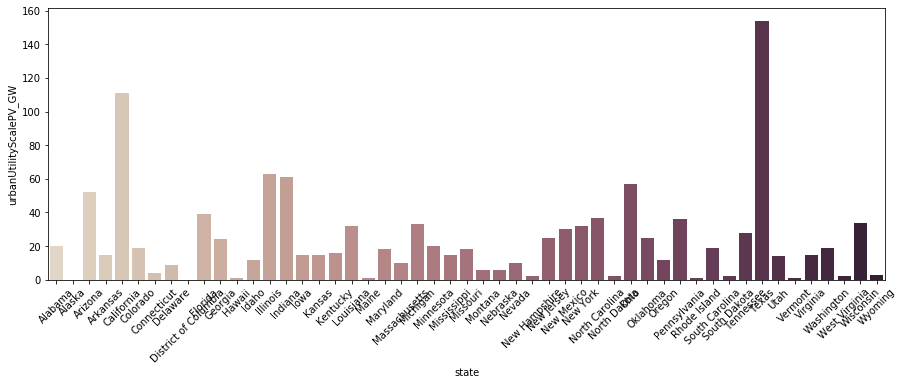

In [16]:
plt.figure(figsize=(15,5))
chart = sns.barplot(
    data=df,
    x='state',
    y='urbanUtilityScalePV_GW',
    palette="ch:.25"
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [17]:
df_rural_pv_sorted = df.sort_values(by='ruralUtilityScalePV_GWh', ascending=False, na_position='first')

In [18]:
df_rural_pv_sorted.head()

,state,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
43,Texas,294684,154,3213,38993581,20411,425230,78716.0,60,22786749,...,5898,0,1254999,0,0,3030250.0,384.0,3006,0,4366
31,New Mexico,71356,30,645,16318543,7087,147652,6513.0,4,16812349,...,353,0,75228,12933,1,1417978.0,179.0,1362,0,1810
16,Kansas,31705,15,317,14500149,6959,144995,8962.0,6,7974255,...,753,0,160219,0,0,989675.0,125.0,2507,0,3201
2,Arizona,121305,52,1096,11867693,5147,107230,22736.0,14,12544333,...,837,0,178188,8329,1,1239147.0,157.0,1303,0,1958
23,Minnesota,33370,20,419,10792814,6510,135627,14321.0,12,0,...,1029,0,219074,0,0,369784.0,46.0,1254,0,1391


In [19]:
df_rooftop_pv_sorted = df.sort_values(by="rooftopPV_GWh", ascending=False, na_position="first")

In [20]:
df_rooftop_pv_sorted.head()

,state,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
1,Alaska,166,0,2,8282976,9005,187608,NaN,1,0,...,61,0,13156,15437,1,NaN,NaN,23675,5,3053
11,Hawaii,3725,1,34,38032,20,430,NaN,2,15369,...,200,0,42602,20632,2,NaN,NaN,2602,0,437
4,California,246008,111,2320,8855917,4010,83549,106411.0,75,8490916,...,15510,1,3300211,130921,16,1344179.0,170.0,30023,6,9692
43,Texas,294684,154,3213,38993581,20411,425230,78716.0,60,22786749,...,5898,0,1254999,0,0,3030250.0,384.0,3006,0,4366
9,Florida,72787,39,830,5137346,2812,58596,63986.0,49,358,...,3693,0,785787,0,0,374161.0,47.0,682,0,493


In [22]:
df_rooftop_pv_sorted = df_rooftop_pv_sorted.reset_index(drop=True)

In [24]:
df_rooftop_pv_sorted.head()

,state,urbanUtilityScalePV_GWh,urbanUtilityScalePV_GW,urbanUtilityScalePV_km2,ruralUtilityScalePV_GWh,ruralUtilityScalePV_GW,ruralUtilityScalePV_km2,rooftopPV_GWh,rooftopPV_GW,CSP_GWh,...,biopowerGaseous_GWh,biopowerGaseous_GW,biopowerGaseous_Tonnes-CH4,geothermalHydrothermal_GWh,geothermalHydrothermal_GW,EGSGeothermal_GWh,EGSGeothermal_GW,hydropower_GWh,hydropower_GW,hydropower_countOfSites
0,Alaska,166,0,2,8282976,9005,187608,NaN,1,0,...,61,0,13156,15437,1,NaN,NaN,23675,5,3053
1,Hawaii,3725,1,34,38032,20,430,NaN,2,15369,...,200,0,42602,20632,2,NaN,NaN,2602,0,437
2,California,246008,111,2320,8855917,4010,83549,106411.0,75,8490916,...,15510,1,3300211,130921,16,1344179.0,170.0,30023,6,9692
3,Texas,294684,154,3213,38993581,20411,425230,78716.0,60,22786749,...,5898,0,1254999,0,0,3030250.0,384.0,3006,0,4366
4,Florida,72787,39,830,5137346,2812,58596,63986.0,49,358,...,3693,0,785787,0,0,374161.0,47.0,682,0,493


In [28]:
df_rooftop_pv_sorted = df_rooftop_pv_sorted.drop([0, 1])

[Text(0, 0.5, ''), Text(0.5, 0, 'Rooftop Photovoltaics Potential(GWh)')]

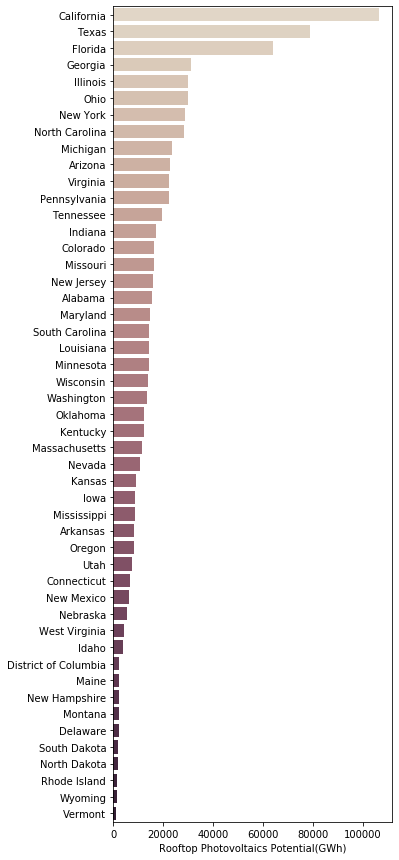

In [31]:
plt.figure(figsize=(5,15))
chart2 = sns.barplot(
    data=df_rooftop_pv_sorted,
    y='state',
    x='rooftopPV_GWh',
    palette="ch:.25"
)
chart2.set(xlabel='Rooftop Photovoltaics Potential(GWh)', ylabel='')

"Denholm and Margolis (2008b) calculated roof footprint by dividing the building footprint by the
number of floors. They estimated 8% of residential rooftops4 and 63% of commercial rooftops were flat"